In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(["science", "notebook", "grid"])

In [38]:
# GADGET kernel
def kernel_gadget(r, h):
    u = np.abs(r/h)
    return 8/(np.pi*h**3) * ((u <= 0.5)*(1 - 6*u**2 + 6*u**3)
            + (u <= 1)*(u > 0.5) * (2 * (1-u)**3))

In [54]:
# cosine
def kernel_cosine(r, h):
    u = np.abs(r/h)
    return (u <= 1) * (np.cos(np.pi*u/2)) / (8 - 64/np.pi**2)

In [55]:
# linear
def kernel_linear(r, h):
    u = np.abs(r / h)
    return (u <= 1) * (1 - u) * 3/np.pi

In [81]:
# gaussian
def kernel_gaussian(r, h):
    u = np.abs(r / h)
    return np.exp(-u**2/2) / (np.sqrt(8)*np.pi**1.5 * h**3)

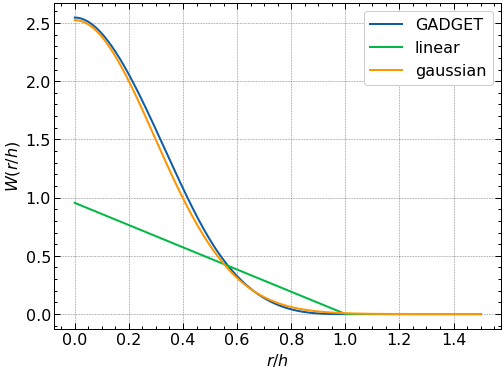

In [90]:
r = np.linspace(0, 1.5, 10000)
dr = r[1] - r[0]

plt.plot(r, kernel_gadget(r, 1), label="GADGET")
#plt.plot(r, kernel_cosine(r, 1), label="cosine")
plt.plot(r, kernel_linear(r, 1), label="linear")
plt.plot(r, kernel_gaussian(r, 0.293), label="gaussian")
plt.xlabel("$r/h$")
plt.ylabel("$W(r/h)$")
plt.legend()
plt.show()

In [91]:
np.sum(4*np.pi*r**2 * dr * kernel_gaussian(r, 0.293))

0.9999913869662728

In [92]:
2.8*0.293

0.8203999999999999